In [14]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['batch_size']= str(2048)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MAPE'
environ['layers'] = '300 200 120 80 30'
environ['dropouts'] = '0.6 0.3 0.6 0.3 0.3'
environ['log'] = 'False'
environ['weight_decay'] = '0.1'
environ['cuda_device'] ='cuda:0'
environ['dataset'] = 'data/speedup_dataset2.pkl'

%run utils.ipynb

In [15]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [15]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


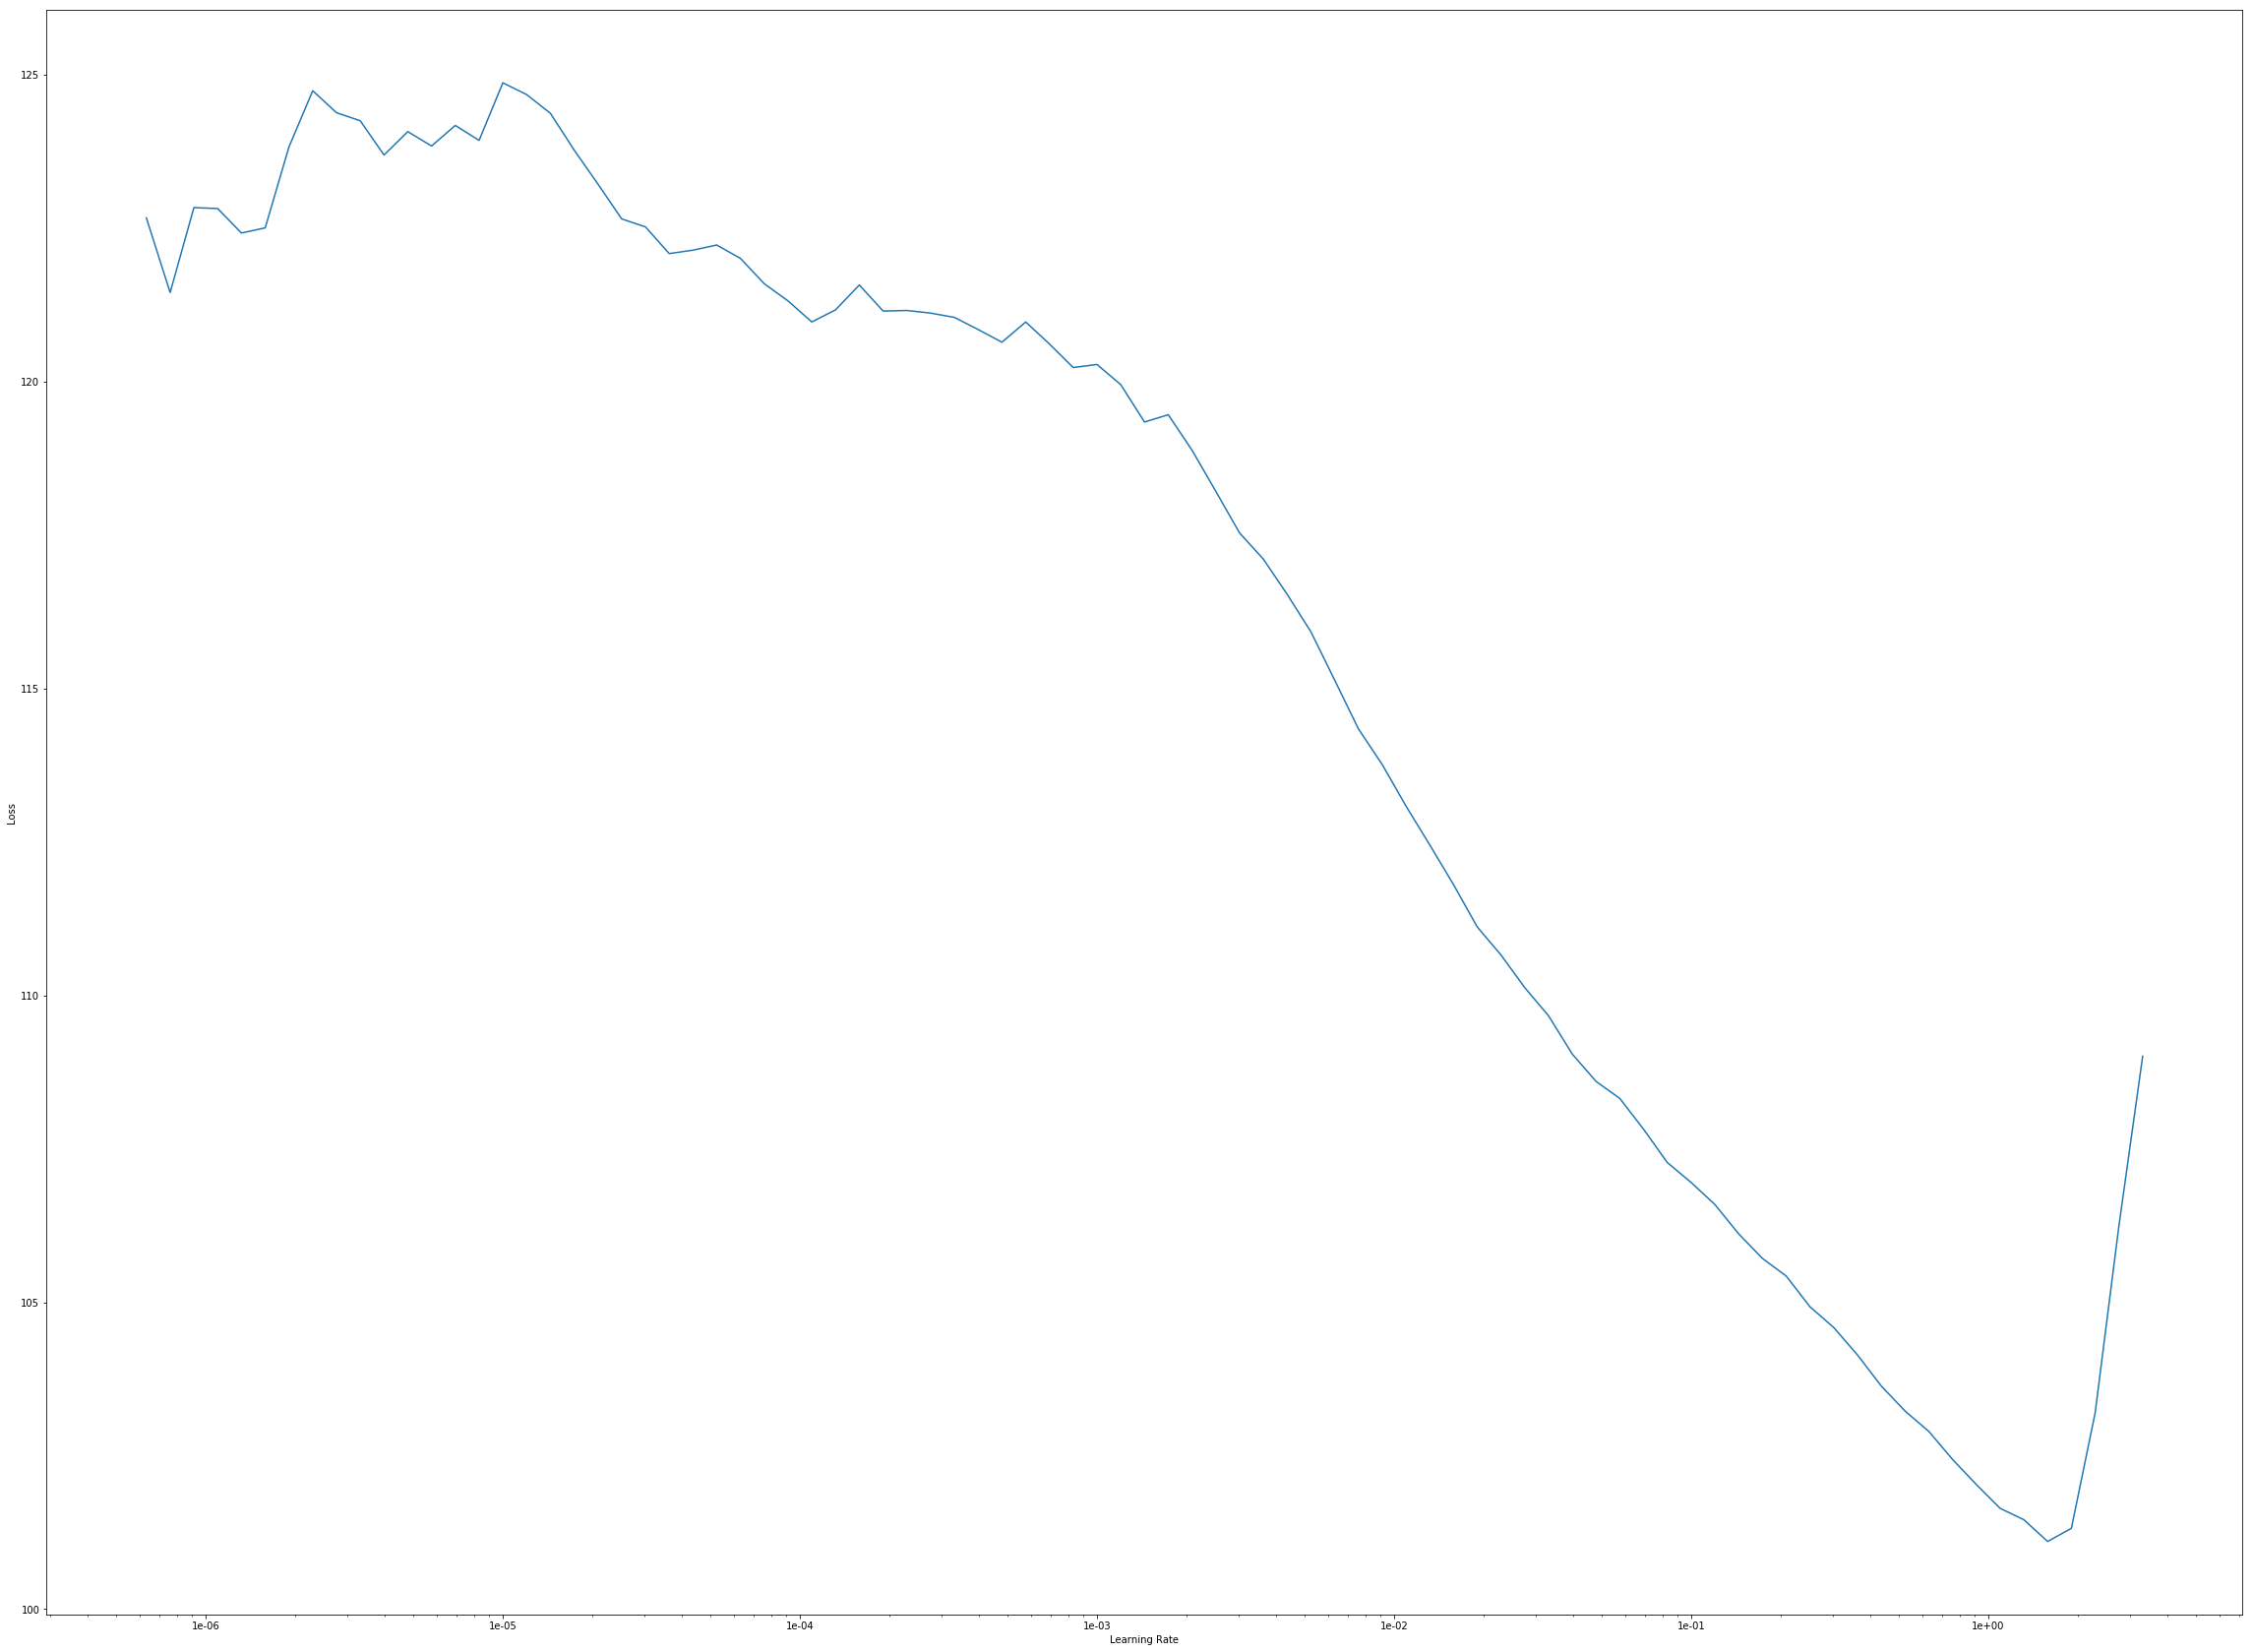

In [16]:
l.recorder.plot()

In [55]:
lr = 1e-05

In [ ]:
l.fit_one_cycle(1000, lr)

epoch,train_loss,valid_loss
1,66.829292,56.195114
2,67.003754,55.577274
3,67.015862,56.614918
4,66.927605,54.845200
5,66.859177,54.783463
6,66.863739,59.452862
7,66.737694,56.442680
8,66.907936,55.545143
9,66.825020,56.161507
10,66.868729,57.129105


In [ ]:
l.recorder.plot_losses()

In [ ]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [3]:
val_df = get_results_df(val_dl, l.model)
train_df = get_results_df(train_dl, l.model)

In [11]:
df = train_df

In [12]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,185651.000000,185651.000000,185651.000000,185651.000000
mean,0.441750,1.184810,0.767819,56.513847
std,0.489344,1.613917,1.286820,37.453495
min,0.046037,0.008491,0.000001,0.000858
25%,0.131613,0.211613,0.069003,31.801729
50%,0.215179,0.565550,0.251056,57.129681
75%,0.607562,1.394052,0.787427,76.417500
max,1.691310,16.089287,16.043249,666.612183


In [17]:
df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,4634.000000,4634.000000,4634.000000,4634.000000
mean,4.592752,5.467480,0.988399,17.515066
std,1.657241,2.195777,1.082530,17.072004
min,0.061757,0.067704,0.000083,0.001791
25%,4.078363,4.479103,0.270361,6.525002
50%,5.225594,5.681032,0.614363,13.428296
75%,5.749725,6.609953,1.320536,22.440917
max,6.685260,13.560771,7.728147,103.807655


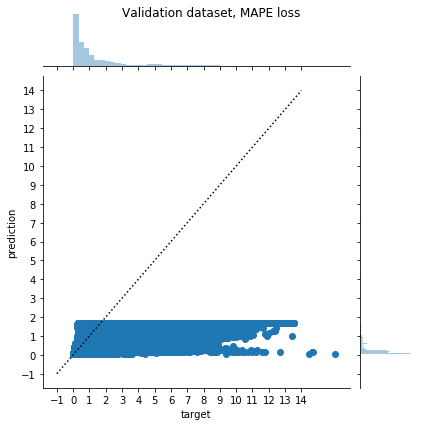

In [13]:
df1 = df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)]
#joint_plot(df1, f"Validation dataset, {loss_func} loss")
df2 = df
joint_plot(df2, f"Validation dataset, {loss_func} loss")